### 2乗和誤差 (mean squared error)
$$ E = \frac {1}{2} \sum_{k} (y_k - t_k)^2$$

- $ y_k $はニューラルネットワークの出力
- $ t_k $は教師データ
- $ k $は データの次元数 

In [38]:
import numpy as np

y = [0.1, 0.05, 0.6, 0.0,0.05,0.1,0.0,0.1,0.0,0.0] # ニューラルネットワークの出力(ソフトマックス関数の出力なので確率)
t = [0,0,1,0,0,0,0,0,0,0] # 教師データ(正解となるラベルを1、それ以外を0とする)

# 2乗和誤差
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# 例1
mean_squared_error(np.array(y), np.array(t))

0.097500000000000031

In [39]:
# 7の確率が最も高い場合
y = [0.1, 0.05, 0.1, 0.0,0.05,0.1,0.0,0.6,0.0,0.0]
# 例2
mean_squared_error(np.array(y), np.array(t))

0.59750000000000003

一つ目の結例の損失関数の方が小さくなっており、教師データとの誤差が小さいことがわかります。
つまり、一つ目の例のほうが、出漁結果が教師データにより適合していることを2乗和誤差は示しているのです。

### 交互エントロピー誤差(cross entropy error)

$$ E = \sum_{k} t_k \log y_k $$

- $ \log $は底が e の自然対数( $\log e$ ) を表します
- $ y_k$ はニューラルネットワークの出力 
- $ t_k$ は正解ラベル（正解となるインデックスだけが1でその他は0）

実質的には正解ラベルが1に対応する出力の自然対数を計算するだけになります。

In [40]:
import numpy as np

# エントロピー誤差の実装
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
cross_entropy_error(np.array(y), np.array(t))

0.51082545709933802

In [41]:
y = [0.1, 0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
cross_entropy_error(np.array(y), np.array(t))

2.3025840929945458

### 交互エントロピー誤差のすべての損失関数の和
$$ E = -\frac{1}{N}\sum_{n} \sum_{k} t_{nk} \log y_{nk} $$

### ミニバッチ学習
訓練データあからある枚数だけを選び出し、その小さな塊（ミニバッチ）毎に学習を行う手法

In [42]:
# 訓練データの中から指定された個数のデータをランダムに選び出す
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [43]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

np.random.choice(60000, 10) # 0〜60000未満の数字の中からランダムに10個の数字を選ぶ

array([46426,  8427, 59231, 15130, 15008, 29526, 52155,   999, 13983, 31473])

In [44]:
# バッチ対応版交互エントロピー誤差の実装
# y はニューラルネットワークの出力
# t は教師データ
def cross_entropy_error(y, t): 
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return  -np.sum(t * np.log(y)) / batch_size

In [45]:
# 教師データがラベルとして与えられたときの交互エントロピー誤差の実装
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

## 数値微分
微分とはある瞬間の変換の量を表したもの

$ \frac{df(x)}{dx} = \lim_{h \to 0}\frac{f(x + h) - f(x)}{h} $

In [46]:
def numerical_diff(f, x):
    h = 1e-4 #0.001
    return (f(x+h) - f(x-h)) / (2*h)

### 数値微分の例
$ y = 0.01x^2 + 0.1x $

In [47]:
# ↑の式はpythonで書くとこうなる
def function_1(x):
    return 0.01*x**2 + 0.1*x

0.1999999999990898
0.2999999999986347


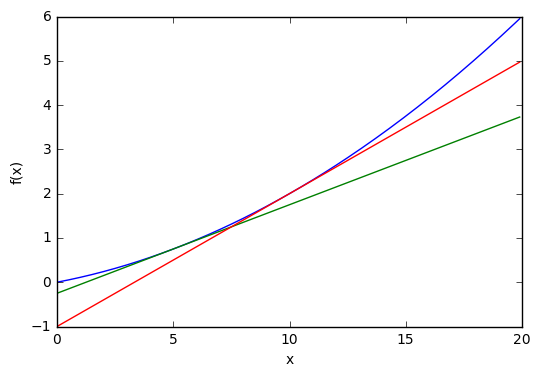

In [48]:
# グラフを描画する
import numpy as np
import matplotlib.pylab as plt

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

# x = 5 のときの傾き
tf = tangent_line(function_1, 5)
y2 = tf(x)
# x = 10 のときの傾き
tf2 = tangent_line(function_1, 10)
y3 = tf2(x)


plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

In [49]:
# この関数の微分を、x=5とx=10のときで、それぞれ計算してみる
numerical_diff(function_1, 5)

0.1999999999990898

In [50]:
numerical_diff(function_1, 10)

0.2999999999986347

# 偏微分
## 複数の変数からなる関数の微分を偏微分という
## 例：引数の2乗和を計算する単純な式
$ f(x_0, x_1 ) = x^2_0  + x^2_1 $


In [51]:
# pythonで表すとこんな感じ
def function_2(x):
    return x[0]**2 + x[1]**2
## または return np,.sum(x**2)

In [54]:
# 問1：x0＝3、x1＝4のときのx0に対する偏微分を求めよ。
def function_tmp1(x0):
    return x0*x0 + 4.0**2

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [57]:
# 問2：x0＝3、x1＝4のときのx1に対する偏微分を求めよ。
def function_tmp2(x1):
    return 3**2 + x1*x1

numerical_diff(function_tmp2, 4)

7.999999999999119

# 勾配 (gradient)
$ (\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1}) $

In [63]:
# 勾配の実装
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x と同じ形状の配列を生成
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 値を元に戻す

    return grad

In [62]:
# 点(3,4)での勾配を求める
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([ 6.,  8.])

In [65]:
# (0,2)での勾配を求める
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([ 0.,  4.])

In [67]:
# (3,0)での勾配を求める
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([ 6.,  0.])

/Users/kesuuyof/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


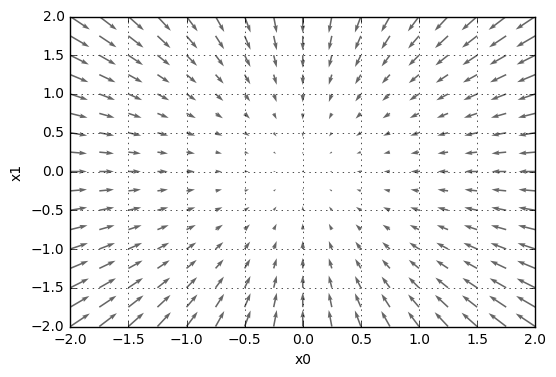

In [68]:

import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

## 勾配が示す方向は各場所において関数の値を最も減らす方向である

# 勾配法
- 一般的に損失関数は複雑です。パラメータ空間は広大であり、どこに最小値を取る場所があるのか検討がつきません。そこで、勾配をうまく利用して関数の最小値（または、できるだけ小さな値）を探そう、というのが勾配法です。
- 勾配の方向が必ず最小値を指すとはかぎらないにせよ、その方向に進むことで関数の値を最も減らせることができます。そのため、最小値の場所を探す問題——もしくは、できるだけ小さな値となる関数の場所を探す問題——においては、勾配の情報を手がかりに、進む方向を決めるべきでしょう。

## 勾配法を数式で表す
$ x_0 = x_0 -  \eta \frac{\partial f}{\partial x_0} $

$ x_1 = x_1 -  \eta \frac{\partial f}{\partial x_1} $

$ \eta $ は更新の量を表す。 ニューラルネットワークの学習における学習率（learning rate）を表す。

In [74]:
# 勾配降下法をpythonで実装する
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

$ f(x_0, x_1) =  x_0^2  + x_1^2 $ の最小値を購買法で求めよ

In [78]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

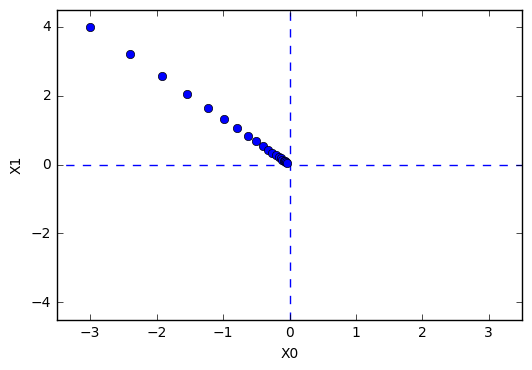

In [94]:
# 勾配法による更新のプロセスを図示
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [100]:
# 学習率が大きすぎる例
init_x = np.array([-3.0, 4.0])    
x, x_history = gradient_descent(function_2, init_x, lr=10.0, step_num=100)
print(x)

[ -2.58983747e+13  -1.29524862e+12]


In [99]:
# 学習率が小さすぎる例
init_x = np.array([-3.0, 4.0])    
x, x_history = gradient_descent(function_2, init_x, lr=1e-10, step_num=100)
print(x)

[-2.99999994  3.99999992]


学習率が大きすぎると、大きな値へと発散してしまいます。

逆に、学習率が小さすぎると、ほとんど更新されずに終わってしまいます。

つまりは、適切な学習率を設定するということが重要な問題になる

# ニューラルネットワークに対する勾配

ここでいう勾配とは重みパラメータに関する損失関数の勾配です。

たとえば、形状が2×3の重みWだけを持つニューラルネットワークがあり、損失関数をLで表す場合を考えましょう。
この場合、勾配は $ \frac{\partial L}{\partial W} $ と表すことができます

$$
W（重み） = 
\begin{pmatrix}
w_{11} & w_{21} & w_{31} \\
w_{12} & w_{22} & w_{32} 
\end{pmatrix}
$$


$$
\frac{\partial L}{\partial W} （勾配） = 
\begin{pmatrix} 
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{31}} \\
\frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{32}} 
\end{pmatrix}
$$

In [108]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np

# ソフトマックス関数
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    # 予測する
    def predict(self, x):
        return np.dot(x, self.W)

    # 損失関数の値を求める tには正解ラベルが入力されるものとする
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        # 正解ラベル1に対応する出力の自然対数を計算する
        loss = cross_entropy_error(y, t)

        return loss



In [109]:
net = simpleNet()
print(net.W)

[[ 1.22422516 -0.28097738 -0.30627974]
 [ 2.66781512 -1.281216    1.03222969]]


In [110]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 3.1355687  -1.32168083  0.74523888]


In [111]:
np.argmax(p) # 最大値のインデックス

0

In [113]:
t = np.array([1, 0, 0]) # 正解ラベル
net.loss(x, t)

0.098209315353479307

In [116]:
# 勾配を求める
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
# この出力がhを1増やすと損失関数の値だどれだけ増加するか表す数値となる
print(dW)

[[-0.05612451  0.00630581  0.04981871]
 [-0.08418677  0.00945871  0.07472806]]


In [117]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

# この出力がhを1増やすと損失関数の値だどれだけ増加するか表す数値となる
print(dW)

[[ 0.35435517  0.22808003 -0.5824352 ]
 [ 0.53153275  0.34212005 -0.87365279]]


In [119]:
# def f(x)のメソッドは lambda という記法で書くこともできる
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.35435517  0.22808003 -0.5824352 ]
 [ 0.53153275  0.34212005 -0.87365279]]


### ニューラルネットワークの勾配を求めれば、あとは勾配法に従って、重みパラメータを更新するだけです。